### Dwika Lintang Nugraha

### 202131085

In [1]:
# Import library yang dibutuhkan
import pandas as pd

### Datasets

In [2]:
# Membaca dataset dari file CSV
data = pd.read_csv('R03_excercises.csv')
data.head()

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3


In [14]:
# Menampilkan informasi tentang dataset, termasuk tipe data dan nilai yang hilang
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Daily Exercise Time (X)  74 non-null     float64
 1   Weight Loss (Y)          74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [15]:
# Menampilkan statistik deskriptif dari dataset
data.describe()

,Daily Exercise Time (X),Weight Loss (Y)
count,74.000000,74.000000
mean,2.124324,1.001351
std,1.021121,0.567980
min,0.400000,0.200000
25%,1.225000,0.500000
50%,2.050000,1.000000
75%,2.975000,1.500000
max,3.900000,2.000000


### Korelasi

In [3]:
# Menghitung korelasi antar kolom-kolom dalam dataset
data.corr()

,Daily Exercise Time (X),Weight Loss (Y)
Daily Exercise Time (X),1.000000,0.990064
Weight Loss (Y),0.990064,1.000000


### Split Data

In [4]:
# Mengambil kolom 'Daily Exercise Time (X)' dan 'Weight Loss (Y)' untuk digunakan dalam pemodelan
import numpy as np
daily_ex = data['Daily Exercise Time (X)'].values[:, np.newaxis]
weight_loss = data['Weight Loss (Y)'].values

### Modelling

In [5]:
# Mengimpor model regresi linear dari scikit-learn
# Menginisialisasi model regresi linear
# Melatih model menggunakan data latih
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(daily_ex, weight_loss)


LinearRegression()

### Testing

In [10]:
# Menyiapkan data uji
# Melakukan prediksi penurunan berat badan untuk data uji
# Menampilkan koefisien dan intercept dari model
daily_ex_test = [[4.5],[5.5]]
weight_loss = model.predict(daily_ex_test)
print("Prediksi Penurunan Berat Badan:", weight_loss)

Prediksi Penurunan Berat Badan: [2.30964741 2.86035224]


In [11]:
# Menampilkan koefisien dan intercept dari model
print("Koefisien: ", model.coef_)
print("Intercept: ", model.intercept_)

Koefisien:  [0.55070483]
Intercept:  -0.16852430493910497


In [12]:
# Menghitung nilai Y (Weight Loss) untuk X (Daily Exercise Time) sebesar 25
y = model.coef_ * 25 + model.intercept_
print(y)

[13.59909633]


### Visualisasi

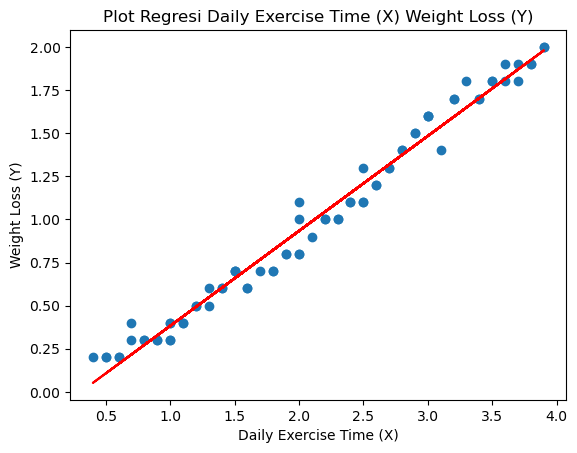

In [13]:
# Visualisasi regresi linear
import matplotlib.pyplot as plt

# Menggunakan model untuk membuat prediksi pada data latih
prediksi_Weight_Loss_Y = model.predict(daily_ex)

# Membuat DataFrame baru untuk visualisasi
dataframe_baru = pd.DataFrame({'Daily Exercise Time (X)': data['Daily Exercise Time (X)'], 'Weight Loss (Y)': prediksi_Weight_Loss_Y})

# Membuat scatter plot dan garis regresi
plt.scatter(data['Daily Exercise Time (X)'], data['Weight Loss (Y)'])
plt.plot(dataframe_baru['Daily Exercise Time (X)'], dataframe_baru['Weight Loss (Y)'], color='red')
plt.xlabel('Daily Exercise Time (X)')
plt.ylabel('Weight Loss (Y)')
plt.title('Plot Regresi Daily Exercise Time (X) Weight Loss (Y)')
plt.show()
